In [79]:
import pickle
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib import cm
from matplotlib.colors import LogNorm, CenteredNorm, SymLogNorm,PowerNorm

from LatexConstants import *

In [2]:
output_dir = '../ThesisPlots/NoCuts/'
run_number = '2124'
in_dir = '../NoCuts/'
dir = in_dir + 'histos/'+run_number+'/'

<Figure size 1000x1000 with 0 Axes>

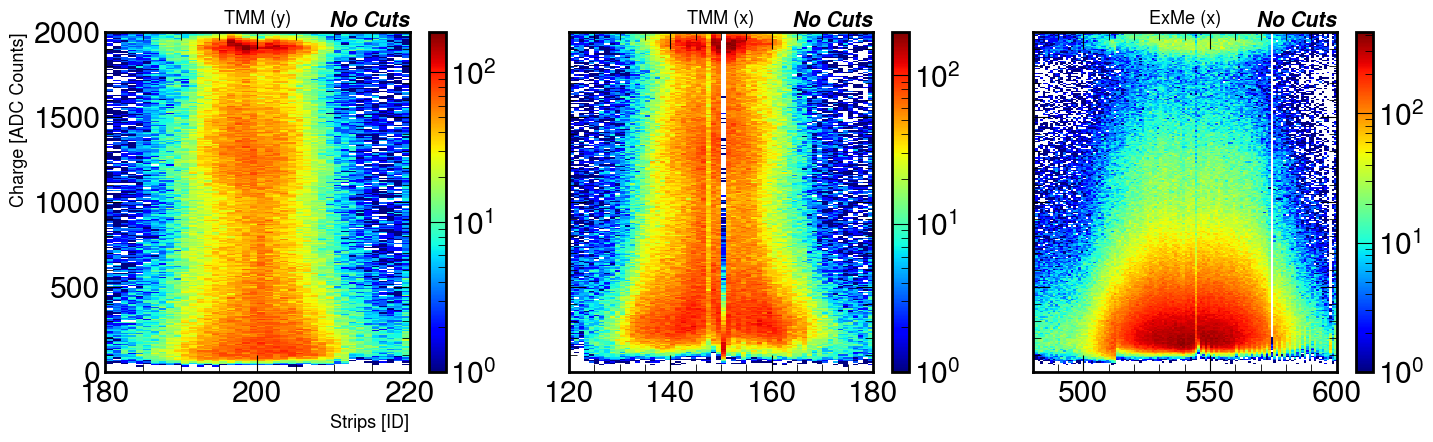

In [5]:
plt.style.use(hep.style.CMS)

# run_number = '2124'
suffix = ['_1st_coordP0_RM1','P0_RM1',  'P2_M01']
labels = ['TMM (y)', 'TMM (x)', 'ExMe (x)']

x_var = 'Strips'
x_unit = 'ID'
y_var = 'Charge'
y_unit = 'ADC Counts'

x_range = [[180, 220], [120, 180], [480, 600]]
y_range = [0, 2000]

x_bins = [x_range[i][1]-x_range[i][0] for i in range(len(x_range))]
y_bins = 250

plt.suptitle(f'{y_var} vs {x_var}')
plt.figure(figsize=(15, 5), dpi = 100)
# fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5), dpi = 100)

for i in range(len(suffix)):
    
    with open(dir + x_var+suffix[i]+'.pkl', 'rb') as file:
        x = pickle.load(file)

    with open(dir + y_var+suffix[i]+'.pkl', 'rb') as file:
        y = pickle.load(file)

    plt.subplot(131+i)
    plt.title(f'{labels[i]}', fontsize= 13)

    if i == 0:  # Hide y-axis labels and ticks for all but the first subplot
        plt.ylabel(f"{y_var} [{y_unit}]", fontsize = 13)
        plt.xlabel(f"{x_var} [{x_unit}]", fontsize = 13)
    if i !=0:
        plt.tick_params(labelleft = False)

    
    plt.hist2d(x, y, bins=((x_bins[i], y_bins)), range=[x_range[i], y_range], cmap = cm.jet, norm = LogNorm(), label = labels[i])
    if 'NoCuts' in in_dir:
        ax = plt.gca()
        x = ax.get_xlim()[1]
        y = ax.get_ylim()[1]
        plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = fontsize)
    plt.colorbar()
    # plt.legend()





plt.tight_layout()
#plt.savefig(f'{output_dir}{y_var}_vs_{x_var}.png', dpi = 600)
#plt.savefig(f'{output_dir}{y_var}_vs_{x_var}.pdf', dpi = 600)
plt.show()

C:\Users\Ospite\AppData\Local\Temp\ipykernel_12700\857215403.py:89: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.05)


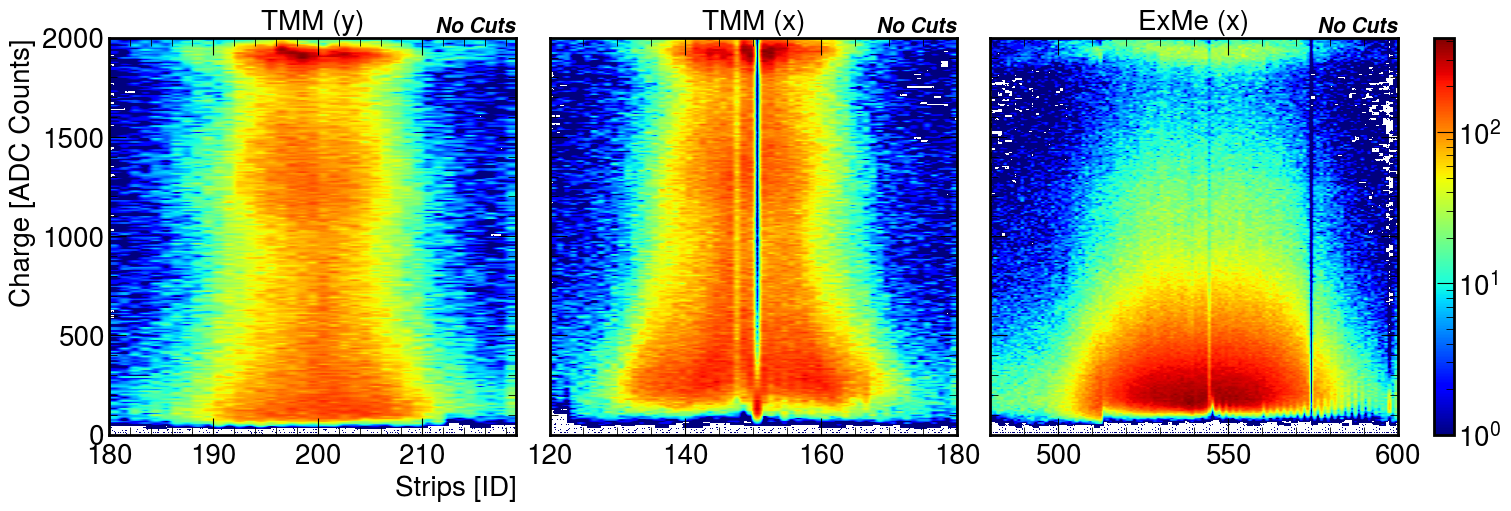

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec as gs

##opening figure and axes
nrows=1
ncols=3
fig, axes = plt.subplots(nrows,ncols, sharey=True, figsize=(15, 5), layout='compressed')

plt.style.use(hep.style.CMS)

# run_number = '2124'
suffix = ['_1st_coordP0_RM1','P0_RM1',  'P2_M01']
labels = ['TMM (y)', 'TMM (x)', 'ExMe (x)']

x_var = 'Strips'
x_unit = 'ID'
y_var = 'Charge'
y_unit = 'ADC Counts'

x_range = [[180, 219], [120, 180], [480, 600]]
y_range = [0, 2000]

x_bins = [x_range[i][1]-x_range[i][0] for i in range(len(x_range))]
y_bins = 250


##produce the actual data and compute the histograms
mappables=[]
for i in range(len(suffix)):
    
    with open(dir + x_var+suffix[i]+'.pkl', 'rb') as file:
        x = pickle.load(file)

    with open(dir + y_var+suffix[i]+'.pkl', 'rb') as file:
        y = pickle.load(file)

    # plt.subplot(131+i)
    # plt.title(f'{labels[i]}', fontsize= 13)

    # if i == 0:  # Hide y-axis labels and ticks for all but the first subplot
        # plt.ylabel(f"{y_var} [{y_unit}]", fontsize = 13)
        # plt.xlabel(f"{x_var} [{x_unit}]", fontsize = 13)
    # if i !=0:
        # plt.tick_params(labelleft = False)

    
    # plt.hist2d(x, y, bins=((x_bins[i], y_bins)), range=[x_range[i], y_range], cmap = cm.jet, norm = LogNorm(), label = labels[i])
    # if 'NoCuts' in in_dir:
    #     ax = plt.gca()
    #     x = ax.get_xlim()[1]
    #     y = ax.get_ylim()[1]
    #     plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
    #          horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = fontsize)
    # plt.colorbar()
    # plt.legend()


    ##the 2d histogram from numpy
    H,xedges,yedges = np.histogram2d(y, x, bins=[y_bins,x_bins[i]], range=[y_range,x_range[i]])

    mappables.append(H)

#the min and max values of all histograms
mappables_flat = np.append(np.append(mappables[0], mappables[1]),mappables[2])
# vmin = np.min(mappables_flat)
# vmax = np.max(mappables_flat)

##second loop for visualisation
i = 0
for ax,H in zip(axes.ravel(),mappables):
    ax.set_title(f'{labels[i]}', fontsize= 20)

    if i == 0:  # Hide y-axis labels and ticks for all but the first subplot
        ax.set_ylabel(f"{y_var} [{y_unit}]", fontsize = 20)
        ax.set_xlabel(f"{x_var} [{x_unit}]", fontsize = 20)
    # if i !=0:
        # plt.tick_params(labelleft = False)
    im = ax.imshow(H, cmap = cm.jet, norm = LogNorm(), aspect='auto', extent=x_range[i]+y_range, origin = 'lower')
    if 'NoCuts' in in_dir:
        x = ax.get_xlim()[1]
        y = ax.get_ylim()[1]
        ax.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
             horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = fontsize)
        ax.tick_params(labelsize = 20)
    i+=1

##colorbar using solution from linked question
fig.subplots_adjust(wspace=0.05)
clb = fig.colorbar(im,ax=axes.ravel(), pad = 0.01)
clb.ax.tick_params(labelsize=20) 
# plt.tight_layout()
plt.savefig('occupancy_new.pdf', dpi = 600)

plt.show()

<Figure size 1000x1000 with 0 Axes>

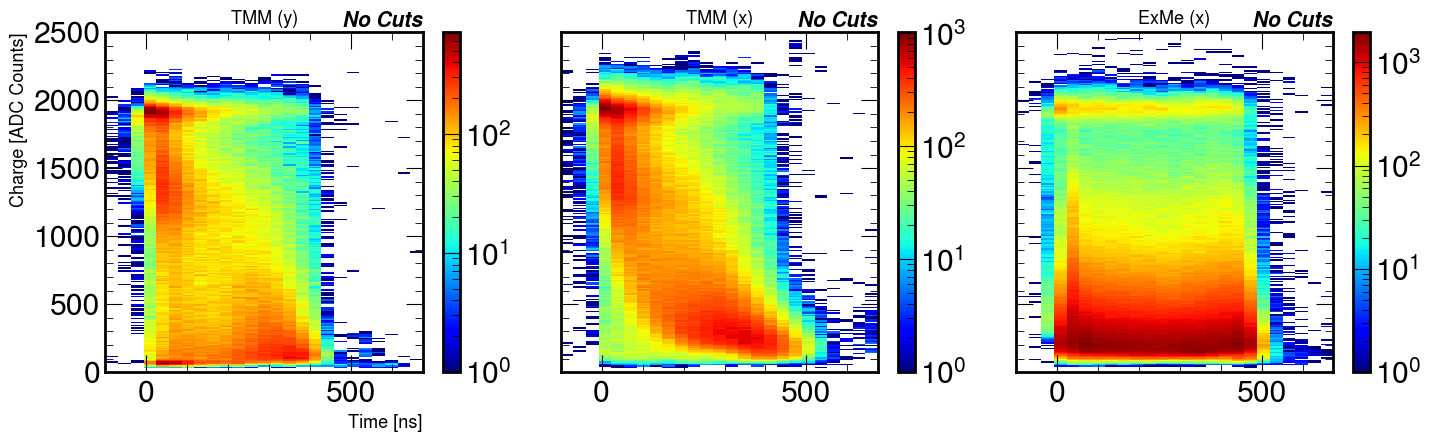

In [15]:
plt.style.use(hep.style.CMS)

# run_number = '2124'
suffix = ['_1st_coordP0_RM1','P0_RM1',  'P2_M01']

x_var = 'Time'
x_unit = 'ns'
y_var = 'Charge'
y_unit = 'ADC Counts'

x_bins = 25
y_bins = 250

x_range = [-100, 675]
y_range = [0, 2500]

plt.suptitle(f'{y_var} vs {x_var}')
plt.figure(figsize=(15, 5), dpi = 100)
# fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5), dpi = 100)

for i in range(len(suffix)):
    
    with open(dir + x_var+suffix[i]+'.pkl', 'rb') as file:
        x = pickle.load(file)

    with open(dir + y_var+suffix[i]+'.pkl', 'rb') as file:
        y = pickle.load(file)

    plt.subplot(131+i)
    plt.title(f'{labels[i]}', fontsize= 13)
    if i == 0:  # Hide y-axis labels and ticks for all but the first subplot
        plt.ylabel(f"{y_var} [{y_unit}]", fontsize = 13)
        plt.xlabel(f"{x_var} [{x_unit}]", fontsize = 13)
    if i !=0:
        plt.tick_params(labelleft = False)
    plt.hist2d(x, y, bins=((x_bins, y_bins)), range=[x_range, y_range], cmap = cm.jet, norm = LogNorm(), label = labels[i])
    plt.colorbar()
    if 'NoCuts' in in_dir:
        ax = plt.gca()
        x = ax.get_xlim()[1]
        y = ax.get_ylim()[1]
        plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
                horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = fontsize)
    # plt.legend()



plt.tight_layout()
#plt.savefig(f'{output_dir}{y_var}_vs_{x_var}.png', dpi = 600)
#plt.savefig(f'{output_dir}{y_var}_vs_{x_var}.pdf', dpi = 600)
plt.show()

<Figure size 1000x1000 with 0 Axes>

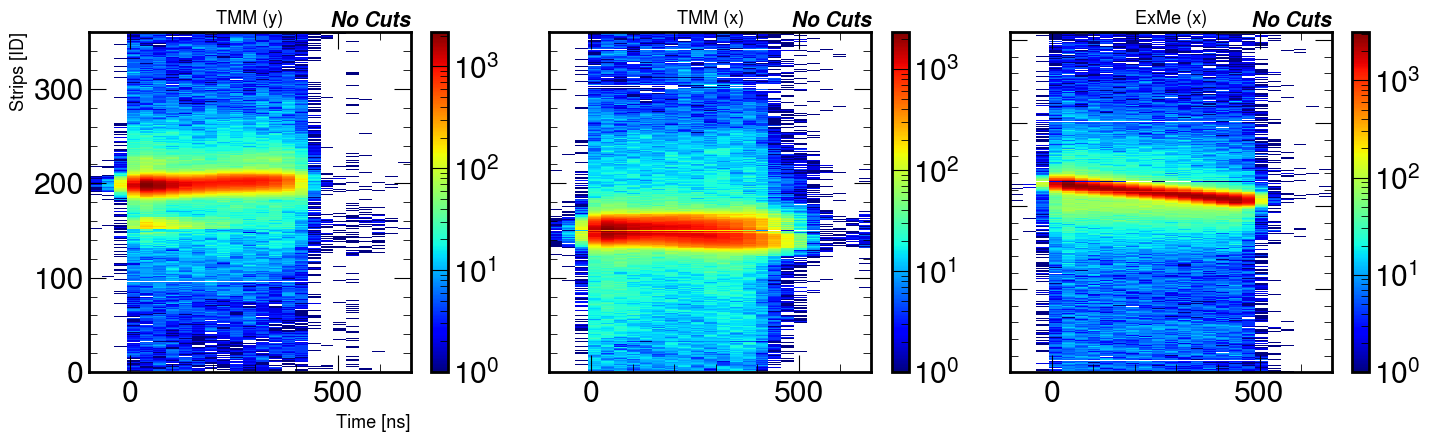

In [16]:
plt.style.use(hep.style.CMS)

# run_number = '2124'
suffix = ['_1st_coordP0_RM1','P0_RM1',  'P2_M01']
# labels = ['P0_RM1 1st', 'P0_RM1', 'P2_M01']

x_var = 'Time'
x_unit = 'ns'
y_var = 'Strips'
y_unit = 'ID'

x_bins = 25
y_bins = [360,360,1024]

x_range = [-100, 675]
y_range = [[0, 360], [0, 360], [0, 1024]]

plt.suptitle(f'{y_var} vs {x_var}')
plt.figure(figsize=(15, 5), dpi = 100)
# fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 5), dpi = 100)

for i in range(len(suffix)):
    
    with open(dir + x_var+suffix[i]+'.pkl', 'rb') as file:
        x = pickle.load(file)

    with open(dir + y_var+suffix[i]+'.pkl', 'rb') as file:
        y = pickle.load(file)

    plt.subplot(131+i)
    plt.title(f'{labels[i]}', fontsize= 13)
    if i == 0:  # Hide y-axis labels and ticks for all but the first subplot
        plt.ylabel(f"{y_var} [{y_unit}]", fontsize = 13)
        plt.xlabel(f"{x_var} [{x_unit}]", fontsize = 13)
    if i !=0:
        plt.tick_params(labelleft = False)
    plt.hist2d(x, y, bins=((x_bins, y_bins[i])), range=[x_range, y_range[i]], cmap = cm.jet, norm = LogNorm(), label = labels[i])
    plt.colorbar()
    if 'NoCuts' in in_dir:
        ax = plt.gca()
        x = ax.get_xlim()[1]
        y = ax.get_ylim()[1]
        plt.text(x = x, y = y, s = 'No Cuts', fontweight = 'bold' , fontstyle = 'italic', 
                horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = fontsize)
    # plt.legend()
    # plt.legend()



plt.tight_layout()
#plt.savefig(f'{output_dir}{y_var}_vs_{x_var}.png', dpi = 600)
#plt.savefig(f'{output_dir}{y_var}_vs_{x_var}.pdf', dpi = 600)
plt.show()

In [11]:
# def Hist2DPlotXSlice(ret, i, bins = 100):
#     xbins = ret[1][0:-1]
#     heights = ret[0][:,i]
#     plt.bar(xbins, heights, width = xbins[1]-xbins[0])

# def Hist2DPlotYSlice(ret, i, bins = 100):
#     ybins = ret[2][0:-1]
#     heights = ret[0][i,:]
#     plt.bar(ybins, heights, width = ybins[1]-ybins[0])

In [8]:
# plt.style.use(hep.style.ATLAS)
# plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
# fontsize = 15

# dir = '../reco/histos/'
# run_number = '2124'
# strips = dir + run_number+'/'+'StripsP0_RM1'+'.pkl'
# charge = dir + run_number+'/'+'ChargeP0_RM1'+'.pkl'

# with open(strips, 'rb') as file:
#     strip_histo = pickle.load(file)

# with open(charge, 'rb') as file:
#     charge_histo = pickle.load(file)


# # plt.title('Charge vs Strip')
# plt.hist2d(strip_histo, charge_histo, bins=((59, 250)), range=[[121, 180], [0, 2500]], cmap = cm.jet,norm = LogNorm())
# plt.colorbar()
# plt.ylabel("Charge [ADC counts]")
# plt.ylim(-10, 2500)
# plt.xlabel("Strips ID")
# plt.legend()
# plt.tight_layout()
# # #plt.savefig(f'{output_dir}charge_vs_strip_TMM_{run_number}noCuts.png', dpi = 600)
# # #plt.savefig(f'{output_dir}charge_vs_strip_TMM_{run_number}noCuts.pdf', dpi = 600)
# plt.show()

In [9]:
# plt.style.use(hep.style.ATLAS)
# plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
# fontsize = 15


# run_number = '2124'
# strips = 'Strips_1st_coordP0_RM1'+'.pkl'
# charge = 'Charge_1st_coordP0_RM1'+'.pkl'

# with open(strips, 'rb') as file:
#     strip_histo = pickle.load(file)

# with open(charge, 'rb') as file:
#     charge_histo = pickle.load(file)


# # plt.title('Charge vs Strip')
# plt.hist2d(strip_histo, charge_histo, bins=((40, 250)), range=[[180, 220], [0, 2500]], cmap = cm.jet,norm = LogNorm())
# plt.colorbar()
# plt.ylabel("Charge [ADC counts]")
# plt.ylim(-10, 2500)
# plt.xlabel("Strips ID")
# plt.legend()
# plt.tight_layout()
# #plt.savefig(f'../../../UsefulPlots/newPlots28June/charge_vs_strip_TMM_1stcoord_{run_number}noCuts.png', dpi = 600)
# #plt.savefig(f'../../../UsefulPlots/newPlots28June/charge_vs_strip_TMM_1stcoord_{run_number}noCuts.pdf', dpi = 600)
# plt.show()

In [10]:
# plt.style.use(hep.style.ATLAS)
# plt.figure(figsize=(textwidth, 0.5*textheight), dpi = 100)
# fontsize = 15


# run_number = '2124'
# strips = 'StripsP2_M01'+'.pkl'
# charge = 'ChargeP2_M01'+'.pkl'



# with open(strips, 'rb') as file:
#     strip_histo = pickle.load(file)

# with open(charge, 'rb') as file:
#     charge_histo = pickle.load(file)


# # plt.title('Charge vs Strip')
# plt.hist2d(strip_histo, charge_histo, bins=((145, 250)), range=[[475, 620], [0, 2500]], cmap = cm.jet,norm = LogNorm())
# plt.colorbar()
# plt.ylabel("Charge [ADC counts]")
# plt.ylim(-10, 2500)
# plt.xlabel("Strips ID")
# plt.legend()
# plt.tight_layout()
# #plt.savefig(f'../../../UsefulPlots/newPlots28June/charge_vs_strip_ExMe_{run_number}noCuts.png', dpi = 600)
# #plt.savefig(f'../../../UsefulPlots/newPlots28June/charge_vs_strip_ExMe_{run_number}noCuts.pdf', dpi = 600)
# plt.show()